# <center> Testing few error estimators

A description of what this notebook does!

## Imports

In [389]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy

In [390]:
from sklearn.metrics import r2_score

In [391]:
def loss_01(test, pred):
    return np.mean(np.abs(test-pred))

In [392]:
def mse(test, pred):
    return np.mean((test-pred)**2)

We are going to use the cancer dataset from scikit-learn package

In [393]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.keys()

['target_names', 'data', 'target', 'DESCR', 'feature_names']

## Data preparation..

In [394]:
data = pd.DataFrame(cancer.data, columns=cancer.feature_names)

In [395]:
data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
3,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
4,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
5,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,0.07613,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
6,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,0.05742,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
7,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,0.07451,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
8,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,0.07389,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
9,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,0.08243,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1962d310>,
      dtype=object)

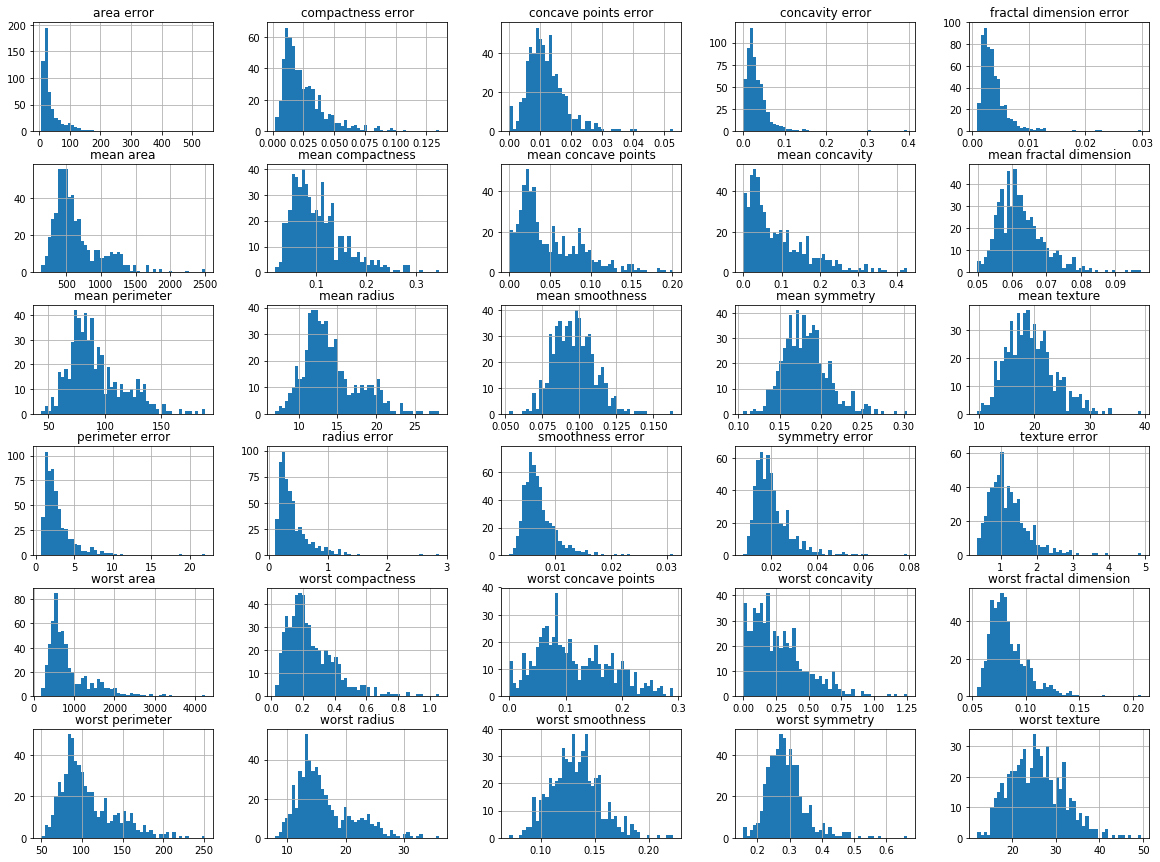

In [396]:
data.hist(bins=50, figsize=(20,15))

It seems like our data needs to be rescaled (from STD point of view)

In [397]:
scaled_data = data / data.std(axis=0)

In [398]:
scaled_data.std(axis=0)

mean radius                1.0
mean texture               1.0
mean perimeter             1.0
mean area                  1.0
mean smoothness            1.0
mean compactness           1.0
mean concavity             1.0
mean concave points        1.0
mean symmetry              1.0
mean fractal dimension     1.0
radius error               1.0
texture error              1.0
perimeter error            1.0
area error                 1.0
smoothness error           1.0
compactness error          1.0
concavity error            1.0
concave points error       1.0
symmetry error             1.0
fractal dimension error    1.0
worst radius               1.0
worst texture              1.0
worst perimeter            1.0
worst area                 1.0
worst smoothness           1.0
worst compactness          1.0
worst concavity            1.0
worst concave points       1.0
worst symmetry             1.0
worst fractal dimension    1.0
dtype: float64

In [399]:
scaled_data = scaled_data - scaled_data.mean(axis=0)

In [400]:
scaled_data.mean(axis=0)

mean radius               -1.791186e-15
mean texture              -2.962676e-15
mean perimeter             3.949975e-15
mean area                  6.454513e-16
mean smoothness            1.312756e-15
mean compactness           4.792105e-16
mean concavity             1.619482e-16
mean concave points       -3.203842e-16
mean symmetry             -1.267488e-15
mean fractal dimension     1.807576e-15
radius error              -4.975516e-16
texture error              9.408604e-16
perimeter error           -9.701281e-16
area error                 7.558882e-16
smoothness error          -3.023163e-15
compactness error          9.428115e-16
concavity error           -4.569670e-16
concave points error       1.326024e-15
symmetry error             3.662370e-15
fractal dimension error   -5.254535e-16
worst radius              -4.265286e-16
worst texture             -2.179081e-15
worst perimeter            7.988142e-16
worst area                 5.209658e-16
worst smoothness           5.962815e-16


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1b8d9510>,
      dtype=object)

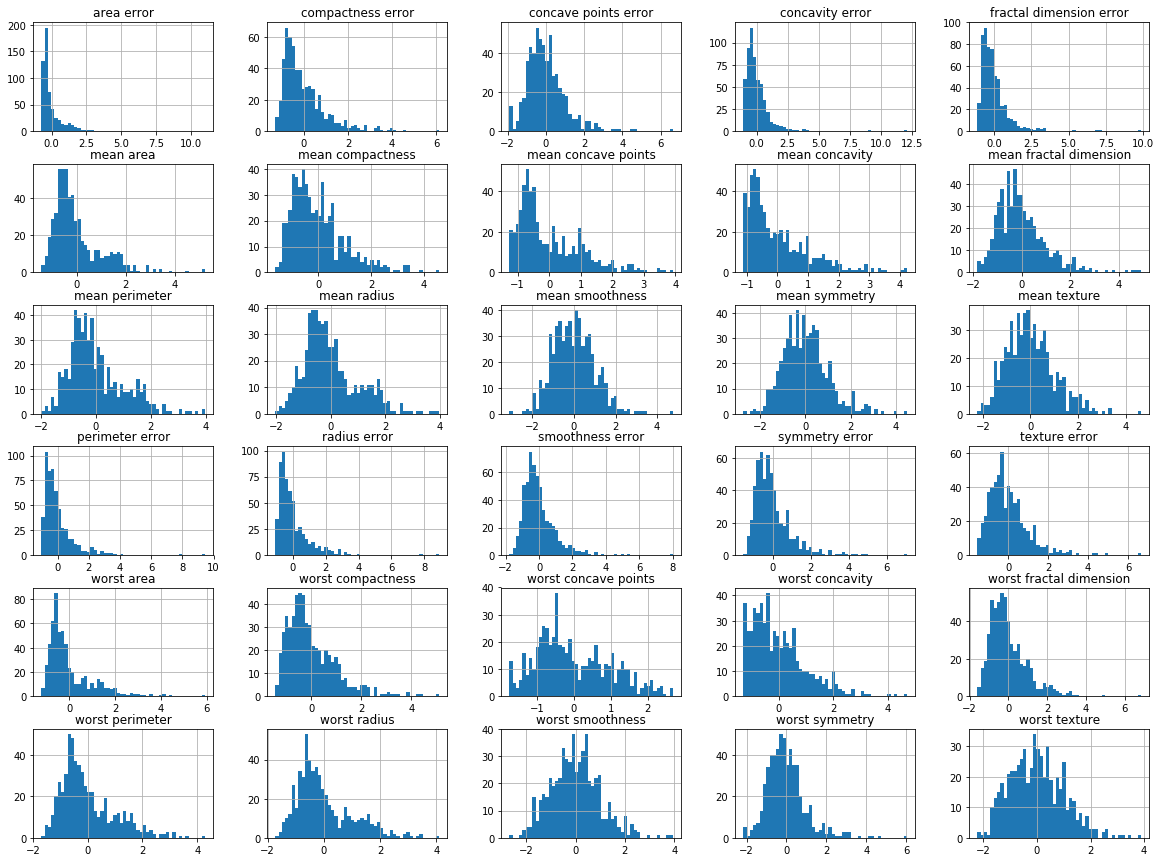

In [401]:
scaled_data.hist(bins=50, figsize=(20,15))

## PCA decomposition

In [402]:
covariance = np.dot(scaled_data.transpose(), scaled_data)/len(scaled_data)

In [403]:
covariance.shape

(30, 30)

In [404]:
eva, eve = np.linalg.eigh(covariance)
eva = np.flip(eva)
eve = np.flip(eve, axis=1)

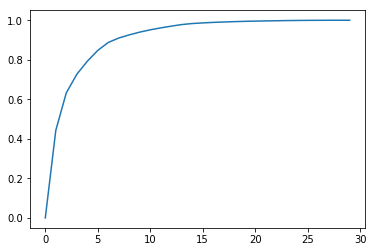

In [405]:
sum_eva = [eva[:i].sum()/eva.sum() for i in range(30)]
plt.plot(sum_eva)

Let's choose 2 PCs

In [406]:
number_of_pc = 2
data_pca = np.dot(scaled_data, eve[:, :number_of_pc])

In [407]:
data_pca.shape

(569, 2)

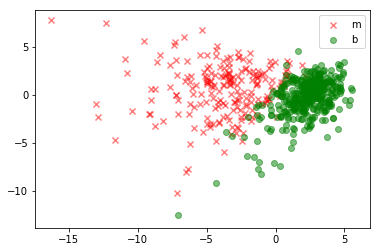

In [408]:
plt.scatter(data_pca[cancer.target==0, 0], data_pca[cancer.target==0, 1], marker='x', c='r', alpha=0.5, label='m')
plt.scatter(data_pca[cancer.target==1, 0], data_pca[cancer.target==1, 1], marker='o', c='g', alpha=0.5, label='b')
plt.legend()

It seems like these two features are enough to classify the cancer. A linear classifier could also solve this problem easily.. I will compare kNN and a linear model to that matter

## Divide in train and test

In [580]:
train_fraction = 0.5

In [581]:
ntot   = len(data_pca)
ntrain = int(ntot*train_fraction)

itrain = np.arange(ntot)
np.random.shuffle(itrain)
itest = itrain[ntrain:].astype(int)
itrain = itrain[:ntrain].astype(int)

x_train, y_train = data_pca[itrain], cancer.target[itrain]
x_test, y_test   = data_pca[itest], cancer.target[itest]

### Using Linear regression: OLS

The best unbiased estimator is $\beta=(X^TX)^{-1}X^Ty$ which is equivalent to LinearRegression from scikit-learn

In [582]:
def do_train_ols(x_train, y_train):
    gramian = np.dot(x_train.T, x_train)
    inv_gramian = np.linalg.inv(gramian)
    beta = np.dot(np.dot(inv_gramian, x_train.T), y_train)

    #ramian.shape, inv_gramian.shape, beta.shape

    #y_pred = np.dot(data_pca, beta)
    #print y_pred*10
    #y_pred = np.array([0 if (y<=0.0) else 1 for y in y_pred ])

    #plt.plot(y_pred, 'o')

    #plt.scatter(x_test[y_pred[itest]==0, 0], x_test[y_pred[itest]==0, 1], 
    #            marker='*', c='b', alpha=0.95, label='m_pred')
    #plt.scatter(x_test[y_pred[itest]==1, 0], x_test[y_pred[itest]==1, 1], 
    #            marker='.', c='k', alpha=0.95, label='b_pred')

    #plt.scatter(x_test[y_test==0, 0], x_test[y_test==0, 1], marker='x', c='r', alpha=0.5, label='m')
    #plt.scatter(x_test[y_test==1, 0], x_test[y_test==1, 1], marker='o', c='g', alpha=0.5, label='b')

    #plt.legend()

    #print 'the training error is', loss(y_train, y_pred[itrain])
    #print 'the test error is    ', loss(y_test, y_pred[itest])

    #print 'the R2 score of this predicion is', r2_score(y_test, y_pred[itest])
    return beta

In [583]:
def do_test_ols(y_test, x_test, beta):
    y_pred = np.dot(x_test, beta)
    test_error = loss_01(y_pred, y_test)
    return test_error

In [584]:
beta_full = do_train_ols(x_train, y_train)
true_test_error = do_test_ols(y_test, x_test, beta_full)
print 'the true test error is', true_test_error

the true test error is 0.63610594265244


In [585]:
beta_full

array([ 0.11408943, -0.02002046])

## In sample error $\~{err}$

In [586]:
in_samlpe_error = do_test_ols(y_train, x_train, beta_full)
print 'the train (in sample) error is', in_samlpe_error, 'and should be lower than true test error', in_samlpe_error<true_test_error

the train (in sample) error is 0.6291002389129916 and should be lower than true test error True


## Leave-One-Out-Bootstrap

In [629]:
def bootstrap(x_train, y_train, b=20):
    errors = np.zeros(b)
    for i in range(b):
        ind = np.arange(len(x_train))
        chosen_ind = np.random.choice(ind, size = len(x_train), replace = True)
        pos_matrix = np.ones(len(x_train))
        pos_matrix[np.array(chosen_ind)] = 0
        pos_matrix = np.array(pos_matrix).astype(bool)
        boot_x, boot_y = x_train[pos_matrix], y_train[pos_matrix]
        #print boot_x.shape
        beta = do_train_ols(boot_x, boot_y)
        #print beta
        pred = np.dot(x_train[np.invert(pos_matrix)], beta)
        #print pred.shape
        pred = np.array([1 if (y<=0.0) else 0 for y in pred ])
        #print pred.shape
        errors[i] = loss_01(y_train[np.invert(pos_matrix)], pred)
    return np.mean(errors)

In [630]:
loob_error = bootstrap(x_train, y_train, b=50)

In [631]:
print 'the train (in sample) error is', loob_error, \
        'and should be higher than true test error', loob_error>true_test_error

the train (in sample) error is 0.9284789078323742 and should be higher than true test error True


## .632 Bootstrap

In [632]:
o632_error = 0.632*loob_error+0.368*in_samlpe_error

In [633]:
print 'the train (in sample) error is', o632_error, \
        'and should be higher than true test error', o632_error>true_test_error

the train (in sample) error is 0.8183075576700414 and should be higher than true test error True


In [634]:
true_test_error

0.63610594265244

## .632+ Bootstrap

In [635]:
pred_full = np.dot(x_train, beta_full)
pred_full = np.array([0 if (y<=0.0) else 1 for y in pred_full ])
gamma = [[x_train[i]-pred_full[j] for i in range(len(x_train))] for j in range(len(x_train))]
gamma = np.mean(gamma)
R = (loob_error - in_samlpe_error) / (gamma - in_samlpe_error)
w = 0.632 / (1 - 0.368*R)
o632_plus_error = (1-w) * in_samlpe_error + w*loob_error

In [636]:
print 'the train (in sample) error is', o632_plus_error, \
        'and should be higher than true test error', o632_plus_error>true_test_error

the train (in sample) error is 0.8023246510441169 and should be higher than true test error True


([<matplotlib.axis.XTick at 0x1a1ef31350>,
 <a list of 5 Text xticklabel objects>)

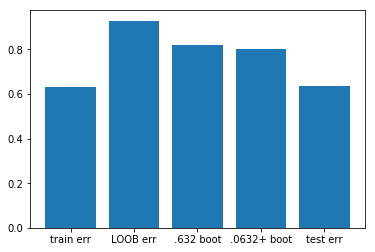

In [648]:
plt.bar(np.arange(5), [in_samlpe_error, loob_error, o632_error, o632_plus_error, true_test_error])
plt.xticks(0.0+np.arange(5), ['train err', 'LOOB err', '.632 boot', '.0632+ boot', 'test err'])